#0 Introduccion
En este trabajo practico haremos una pequeña muestra de como funcionan las redes neuronales y como el entrenamiento de la IA que reconocera las imagenes se hace mas rapido con GPU que con CPU durante los ciclos Epoch (fases o ciclos de entrenamiento de renocimiento de imagenes).

#1 Armado de ambiente

1) Se inserta el zip con el directorio de carpetas que contienen las fotos a analizar

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fotos.zip to fotos.zip


2) Se descomprime el zip dentro de colab

In [2]:
import zipfile
import io

data = zipfile.ZipFile(io.BytesIO(uploaded['fotos.zip']),'r')
data.extractall()

#2 Desarrollo


In [3]:
#@title # 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique de que tipo son el conjunto 1 de fotos:
nombreItem1 = "Cielo" #@param {type:"string"}
#@markdown ### Especifique de que tipo son el conjunto 2 de fotos:
nombreItem2 = "Lava" #@param {type:"string"}
#@markdown ---

In [4]:
if len(nombreItem1) is 0 or len(nombreItem2) is 0:
	raise Exception("Los parametros no pueden ser vacios")


3) Se cargan en un vector las imagenes de la carpeta Item1 con un tamaño de 150x150

In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_item1 = "/content/Item1"
items1=[]
img_size=150

for img in os.listdir(ruta_item1):
  img = cv2.imread(os.path.join(ruta_item1,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  items1.append(img_resize)

  print(len(items1))

1
2
3
4
5
6
7
8


4) Se muestra que en el vector se cargaron N imagenes de 150x150

In [6]:
items1 = np.array(items1)
print(items1.shape)

(8, 150, 150, 3)


5) Se muestra un ejemplo de que las imagenes fueron cargadas con exito

In [7]:
#@title # 5.1 Parámetro para visualizar imagen
#@markdown ---
#@markdown ### Especifique un numero de 0 a N-1 siendo N la cantidad de fotos en la carpeta Item1:
numeroImagenItem1 =  0#@param {type:"integer"}
#@markdown ---

(150, 150, 3)


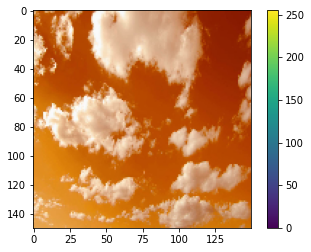

In [8]:
if numeroImagenItem1 < 0:
  raise Exception("El numero no puede ser negativo.")
if numeroImagenItem1 >= len(items1):
  raise Exception("El no puede ser igual o mayor al numero de las imagenes")

print(items1[numeroImagenItem1].shape)
plt.figure()
plt.imshow(np.squeeze(items1[numeroImagenItem1]))
plt.colorbar()
plt.grid(False)
plt.show()

6) Se cargan en un vector todas las imagenes de la carpeta Item2 en un tamaño 150x150

In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

ruta_items2 = "/content/Item2"
items2=[]
img_size=150

for img in os.listdir(ruta_items2):
  img = cv2.imread(os.path.join(ruta_items2,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  items2.append(img_resize)

  print(len(items2))

1
2
3
4
5
6


7) Se muestra que las N imagenes del Item2 fueron cargadas con exito

In [10]:
items2 = np.array(items2)
print(items2.shape)

(6, 150, 150, 3)


8) Se muestra un ejemplo de que se cargaron con exito las imagenes del item2

In [11]:
#@title # 8.1 Parámetro para visualizar imagen
#@markdown ---
#@markdown ### Especifique un numero de 0 a N-1 siendo N la cantidad de fotos en la carpeta Item2:
numeroImagenItem2 =  0#@param {type:"integer"}
#@markdown ---

(150, 150, 3)


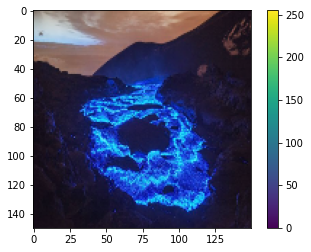

In [12]:
if numeroImagenItem2 < 0:
  raise Exception("El numero no puede ser negativo.")
if numeroImagenItem2 >= len(items2):
  raise Exception("El no puede ser igual o mayor al numero de las imagenes")

print(items2[numeroImagenItem2].shape)
plt.figure()
plt.imshow(np.squeeze(items2[numeroImagenItem2]))
plt.colorbar()
plt.grid(False)
plt.show()

9) Concateno en un vector las imagenes de ambos items

In [13]:
imagenes = np.concatenate([items1,items2])
print(len(imagenes))

Imagenes = np.array(imagenes)
print(Imagenes.shape)

14
(14, 150, 150, 3)


10) Se cargan las etiquetas de reconocimiento para decir a que tipo de item nos estamos refiriendo con las fotos cargadas

In [14]:
etiquetas_items1 = np.repeat(0,len(items1))
print(len(etiquetas_items1))
print(etiquetas_items1)

etiquetas_items2 = np.repeat(1,len(items2))
print(len(etiquetas_items2))
print(etiquetas_items2)

class_names = [nombreItem1,nombreItem2]

8
[0 0 0 0 0 0 0 0]
6
[1 1 1 1 1 1]


11) Concateno en un vector ambos vectores de etiquetas

In [15]:
labels = np.concatenate([etiquetas_items1,etiquetas_items2])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)

14
[0 0 0 0 0 0 0 0 1 1 1 1 1 1]
(14,)


12) Imprimo el total de imagenes con su respectiva etiqueta

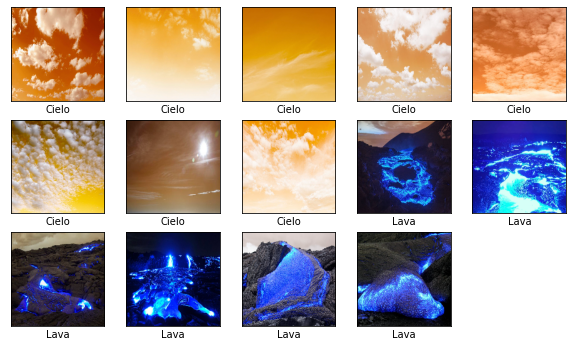

In [16]:
plt.figure(figsize=(10,10))

for i in range(14):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Imagenes[i])
  plt.xlabel(class_names[Labels[i]])
plt.show()

13) Importo tensor flow

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer
print(tf.__version__)

2.5.0


14) Se hace el ciclado de reconocimiento de imagenes (entrenamiento) que permitira al algoritmo tener una posibilidad de acertar a que tipo de item pertenece la nueva imagen. No es un algoritmo 100% eficaz, ya que depende del tipo de imagen que se inserte y los colores de fondo.
Aun asi, este nos parecio un buen motivo para comparar la velocidad de la CPU contra la GPU, donde claramente la GPU es la ganadora.
Es conveniente ejecutar esta porcion de codigo hasta que se llegue a un 100 de precision.

In [5]:
#@title # 14.1 Cantidad de ciclos epoch a realizar
#@markdown ---
#@markdown ### Especifique la cantidad de ciclos para reconocer imagenes:
cantEpochs =  28 #@param {type:"integer"}
#@markdown ---

In [6]:
if cantEpochs <= 0:
	raise Exception("No puede haber epochs negativos o iguales a 0")

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150,150,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Imagenes, Labels, epochs=cantEpochs)
trained = model.fit(Imagenes, Labels, epochs=cantEpochs)

Epoch 1/28
1/1 [==============================] - 0s 257ms/step - loss: 293.1170 - accuracy: 0.3571
Epoch 2/28
1/1 [==============================] - 0s 6ms/step - loss: 8308.9443 - accuracy: 0.5714
Epoch 3/28
1/1 [==============================] - 0s 8ms/step - loss: 4202.5288 - accuracy: 0.5714
Epoch 4/28
1/1 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/28
1/1 [==============================] - 0s 5ms/step - loss: 3367.3071 - accuracy: 0.5000
Epoch 6/28
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/28
1/1 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/28
1/1 [==============================] - 0s 5ms/step - loss: 175.8020 - accuracy: 0.9286
Epoch 9/28
1/1 [==============================] - 0s 5ms/step - loss: 697.3452 - accuracy: 0.7857
Epoch 10/28
1/1 [==============================] - 0s 7ms/step - loss: 442.7435 - accuracy: 0.8571
Epoch 11

15) Cargo las imagenes que el algoritmo tratara de filtrar

In [21]:
path_imagen = "/content/ImagenesTest"
test=[]
img_size = 150
for img in os.listdir(path_imagen):
  img = cv2.imread(os.path.join(path_imagen,img))
  img_resize = cv2.resize(img,(img_size,img_size))
  img = np.array(img_resize)
  test.append(img)

ImagenesTest = np.array(test)
print(ImagenesTest.shape)

(4, 150, 150, 3)


In [28]:
#@title # 15.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique un numero de 0 a N-1 siendo N la cantidad de fotos en la carpeta de ImagenesTest:
numeroImagenTest =  0#@param {type:"integer"}
#@markdown ---

16) Se imprime la imagen que se testeara y se realiza su reconocimiento

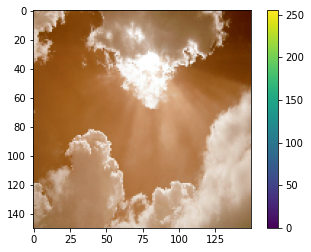

[[1. 0.]]
1.0
0
Tipo: Cielo


In [29]:
if numeroImagenTest < 0:
  raise Exception("El numero no puede ser negativo.")
if numeroImagenTest >= len(test):
  raise Exception("El no puede ser igual o mayor al numero de las imagenes")

img = ImagenesTest[numeroImagenTest]
plt.figure()
plt.imshow(np.squeeze(img))
plt.colorbar()
plt.grid(False)
plt.show()

img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print("Tipo: " + class_names[np.argmax(predictions_single)])

#3 Conclusion
Probamos ejecutando todo el programa tanto en CPU como en GPU y la diferencia de velocidad que hay es bastante grande a favor de la GPU ya que teniendo en cuenta que si hay un volumen grande de imagenes, la GPU podra realizar el reconocimiento mucho mas rapido que con la CPU.

#4 Bibliografia
https://www.tensorflow.org/api_docs/python/tf/keras/Model

https://numpy.org/doc/stable/reference/routines.array-manipulation.html

https://www.youtube.com/watch?v=-m_xAgz1tIw
